BioGIM CALIBRATION

Joint Calibration (Triplicate Dataset, CI Output)


Joint Fit Parameters (±95% CI):
μmax-H: 0.4956 ± 0.29
Ks: 0.08788 ± 0.083
Ki: 0.2196 ± 0.21
Pso4_max: 0.1258 ± 0.0036
ms: 1e-05 ± 0.00011
k_so: 1e-05 ± 0.024
μmax-true = 0.2188 h⁻¹
k = 1.60
S_max_h = 0.1389 M


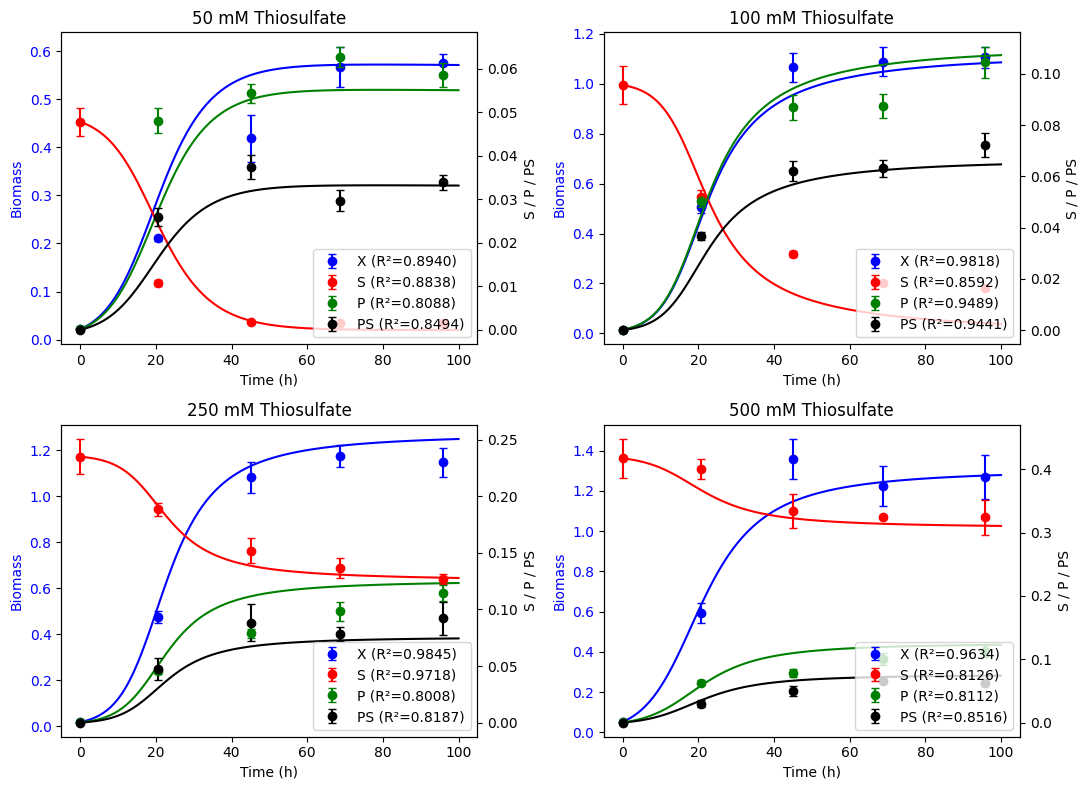

In [4]:
# ============ JOINT DATASET CALIBRATION =============

# -------- Import Libraries --------
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.stats import sem, t

# ===================== LOAD AND ORGANIZE DATASETS =====================
# -------- Triplicate Experimental Data --------
t_data = np.array([0.00, 20.58, 45.02, 68.72, 95.80])  # Incubation time same for all

# Datasets: Biomass (X), Substrate (S), Sulfate (P), Elemental Sulfur (PS)
datasets_trip = {
    "50 mM": {
        "X": np.array([
            [0.0223, 0.2083, 0.4372, 0.5738, 0.5847],
            [0.0212, 0.2114, 0.4208, 0.5495, 0.5724],
            [0.0210, 0.2127, 0.3984, 0.5818, 0.5699]
        ]),
        "S": np.array([
            [0.0493, 0.0107, 0.0018, 0.0016, 0.0016],
            [0.0471, 0.0111, 0.0020, 0.0017, 0.0016],
            [0.0471, 0.0106, 0.0019, 0.0015, 0.0016]
        ]),
        "P": np.array([
            [0.0001, 0.0484, 0.0548, 0.0638, 0.0577],
            [0.0001, 0.0468, 0.0534, 0.0627, 0.0598],
            [0.0001, 0.0491, 0.0549, 0.0619, 0.0583]
        ]),
        "PS": np.array([
            [0.0000, 0.0251, 0.0365, 0.0305, 0.0331],
            [0.0000, 0.0267, 0.0387, 0.0286, 0.0344],
            [0.0000, 0.0260, 0.0372, 0.0300, 0.0342]
        ])
    },
    "100 mM": {
        "X": np.array([
            [0.0142, 0.5177, 1.0781, 1.1037, 1.1271],
            [0.0137, 0.4983, 1.0804, 1.0619, 1.0996],
            [0.0137, 0.5038, 1.0389, 1.1028, 1.0961]
        ]),
        "S": np.array([
            [0.0990, 0.0523, 0.0292, 0.0182, 0.0167],
            [0.0942, 0.0530, 0.0298, 0.0184, 0.0161],
            [0.0937, 0.0510, 0.0301, 0.0183, 0.0166]
        ]),
        "P": np.array([
            [0.0001, 0.0500, 0.0892, 0.0861, 0.1025],
            [0.0001, 0.0512, 0.0853, 0.0865, 0.1073],
            [0.0001, 0.0494, 0.0865, 0.0896, 0.1040]
        ]),
        "PS": np.array([
            [0.0000, 0.0361, 0.0602, 0.0644, 0.0740],
            [0.0000, 0.0374, 0.0632, 0.0617, 0.0703],
            [0.0000, 0.0366, 0.0627, 0.0632, 0.0729]
        ])
    },
    "250 mM": {
        "X": np.array([
            [0.0162, 0.4788, 1.1108, 1.1631, 1.1773],
            [0.0170, 0.4631, 1.0578, 1.1976, 1.1370],
            [0.0176, 0.4825, 1.0803, 1.1676, 1.1306]
       ]),
        "S": np.array([
            [0.2418, 0.1911, 0.1472, 0.1376, 0.1247],
            [0.2293, 0.1867, 0.1561, 0.1328, 0.1275],
            [0.2341, 0.1876, 0.1524, 0.1400, 0.1283]
        ]),
        "P": np.array([
            [0.0001, 0.0450, 0.0805, 0.1017, 0.1170],
            [0.0001, 0.0472, 0.0790, 0.0981, 0.1116],
            [0.0001, 0.0458, 0.0772, 0.0951, 0.1151]
        ]),
        "PS": np.array([
            [0.0000, 0.0452, 0.0960, 0.0755, 0.0981],
            [0.0000, 0.0516, 0.0853, 0.0805, 0.0861],
            [0.0000, 0.0448, 0.0837, 0.0789, 0.0921]
        ])
    },
    "500 mM": {
        "X": np.array([
            [0.0510, 0.6100, 1.4000, 1.2326, 1.3000],
            [0.0535, 0.6005, 1.3200, 1.1800, 1.2200],
            [0.0524, 0.5700, 1.3567, 1.2600, 1.2894]
        ]),
        "S": np.array([
            [0.4306, 0.4072, 0.3308, 0.3243, 0.3123],
            [0.4145, 0.3946, 0.3463, 0.3251, 0.3346],
            [0.4065, 0.4004, 0.3255, 0.3232, 0.3258]
        ]),
        "P": np.array([
            [0.0001, 0.0646, 0.0812, 0.0971, 0.1163],
            [0.0001, 0.0617, 0.0765, 0.1043, 0.1091],
            [0.0001, 0.0620, 0.0772, 0.0995, 0.1130]
        ]),
        "PS": np.array([
            [0.0000, 0.0282, 0.0484, 0.0663, 0.0608],
            [0.0000, 0.0327, 0.0538, 0.0653, 0.0649],
            [0.0000, 0.0288, 0.0474, 0.0655, 0.0636]
        ])
    }
}

# ===================== UTILITY FUNCTIONS =====================
# --- Mean and 95% Confidence Interval ---
def mean_ci(data):
    mean = np.mean(data, axis=0)
    ci = sem(data, axis=0) * t.ppf(0.975, df=data.shape[0]-1)
    return mean, ci

# --- Root Mean Square Error ---
def calculate_rmse(observed, predicted): 
    return np.sqrt(np.mean((observed - predicted) ** 2))

# --- Coefficient of Determination (R²) ---
def r2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)


# ===================== PREPARE CALIBRATION DATASET (MEANS) =====================
datasets = {}
for key, val in datasets_trip.items():
    datasets[key] = {
        "t": t_data,
        "X": np.mean(val["X"], axis=0),
        "S": np.mean(val["S"], axis=0),
        "P": np.mean(val["P"], axis=0),
        "PS": np.mean(val["PS"], axis=0)
    }

# ===================== MODEL DEFINITION =====================
# -------- Fixed Model Parameters --------
Yxs = 11.6
Yps = 1.16
Yp2s = 0.7
Ks_switch = 0.010
Yso4_s0 = 0.00000
k = 1.6

# -------- Model function --------
def model(y, t, u, Ks, Ki, Pso4_max, ms, k_so):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** k)  #Eq. 10
    dXdt = mu * X                                                                   #Eq. 6
    r_so = k_so * Ps * X if S < Ks_switch else 0                                    #Eq. 17
    dSdt = (dXdt * (-1 / Yxs)) - ms * X                                             #Eq. 14
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so                                      #Eq. 15
    dP2dt = dXdt * (Yp2s / Yxs) - r_so                                              #Eq. 16
    return [dXdt, dSdt, dPdt, dP2dt]


# ===================== GLOBAL OBJECTIVE FUNCTION =====================
def global_objective(all_t, u, Ks, Ki, Pso4_max, ms, k_so):
    all_predictions = []
    for data in datasets.values():
        t_data = data["t"]
        y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
        sol = odeint(model, y0, t_data, args=(u, Ks, Ki, Pso4_max, ms, k_so))
        all_predictions.extend(sol[:, 0])  # X
        all_predictions.extend(sol[:, 1])  # S
        all_predictions.extend(sol[:, 2])  # P
        all_predictions.extend(sol[:, 3])  # PS
    return np.array(all_predictions)

# ===================== STACK ALL EXPERIMENTAL DATA =====================
all_exp_data = []
all_t_dummy = []
for data in datasets.values():
    all_t_dummy.extend(data["t"])
    all_exp_data.extend(data["X"])
    all_exp_data.extend(data["S"])
    all_exp_data.extend(data["P"])
    all_exp_data.extend(data["PS"])
all_exp_data = np.array(all_exp_data)
all_t_dummy = np.array(all_t_dummy)

# ===================== PARAMETER FITTING =====================
initial_guess = [0.3, 0.05, 0.5, 0.100, 0.001, 0.001]  # [u, Ks, Ki, Pso4_max, ms, k_so]
bounds = (
    [0.001, 0.001, 0.1, 0.01, 0.00001, 0.00001],  # Lower bounds
    [5, 0.5, 2, 1, 0.01, 1.0]                     # Upper bounds
)

popt, pcov = curve_fit(
    lambda t, u, Ks, Ki, Pso4_max, ms, k_so: global_objective(t, u, Ks, Ki, Pso4_max, ms, k_so),
    all_t_dummy, all_exp_data,
    p0=initial_guess, bounds=bounds
)
u, Ks, Ki, Pso4_max, ms, k_so = popt

# ===================== PARAMETER CONFIDENCE INTERVALS =====================
dof = max(0, len(all_exp_data) - len(popt))
tval = t.ppf(0.975, dof) if dof > 0 else 1.96
perr = np.sqrt(np.diag(pcov))
ci_pm = tval * perr
param_names = ["μmax-H", "Ks", "Ki", "Pso4_max", "ms", "k_so"]

# ===================== DERIVED HALDANE METRICS =====================
umax_true = u / (1 + 2*(Ks/Ki)**0.5)               # True maximum specific growth rate, umax
S_max_h = (Ks * Ki)**0.5                           # Substrate concentration at which umax occurs, Smax

# ===================== PRINT OUTPUT =====================
print(f"\nJoint Fit Parameters (±95% CI):")
for i, name in enumerate(param_names):
    print(f"{name}: {popt[i]:.4g} ± {ci_pm[i]:.2g}")

print(f"μmax-true = {umax_true:.4f} h⁻¹")
print(f"k = {k:.2f}")
print(f"S_max_h = {S_max_h:.4f} M")

# ===================== PLOTTING MODEL FITS AND DATA =====================
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for i, (key, data) in enumerate(datasets_trip.items()):
    t_points = t_data
    X_mean, X_ci = mean_ci(data["X"])
    S_mean, S_ci = mean_ci(data["S"])
    P_mean, P_ci = mean_ci(data["P"])
    PS_mean, PS_ci = mean_ci(data["PS"])

    # Simulate model
    y0 = [X_mean[0], S_mean[0], P_mean[0], PS_mean[0]]
    t_fine = np.linspace(0, 100, 100)
    sol = odeint(model, y0, t_fine, args=(u, Ks, Ki, Pso4_max, ms, k_so))
    X_fit, S_fit, P_fit, PS_fit = sol.T

    # Model values at measurement points
    X_pred = np.interp(t_points, t_fine, X_fit)
    S_pred = np.interp(t_points, t_fine, S_fit)
    P_pred = np.interp(t_points, t_fine, P_fit)
    PS_pred = np.interp(t_points, t_fine, PS_fit)

    # R2 & RMSE calculations
    r2_X = r2(X_mean, X_pred)
    r2_S = r2(S_mean, S_pred)
    r2_P = r2(P_mean, P_pred)
    r2_PS = r2(PS_mean, PS_pred)

    rmse_X = calculate_rmse(X_mean, X_pred)
    rmse_S = calculate_rmse(S_mean, S_pred)
    rmse_P = calculate_rmse(P_mean, P_pred)
    rmse_PS = calculate_rmse(PS_mean, PS_pred)

    # Plotting: Biomass (left y) and S/P/PS (right y)
    ax = axes[i]
    ax2 = ax.twinx()
    ax.plot(t_fine, X_fit, 'b-')
    ax.errorbar(t_points, X_mean, yerr=X_ci, fmt='o', color='b', capsize=3, label=f'X (R²={r2_X:.4f})')
    ax.set_ylabel("Biomass", color='b')
    ax.tick_params(axis='y', labelcolor='b')

    ax2.plot(t_fine, S_fit, 'r-')
    ax2.plot(t_fine, P_fit, 'g-')
    ax2.plot(t_fine, PS_fit, 'k-')
    ax2.errorbar(t_points, S_mean, yerr=S_ci, fmt='o', color='r', capsize=3, label=f'S (R²={r2_S:.4f})')
    ax2.errorbar(t_points, P_mean, yerr=P_ci, fmt='o', color='g', capsize=3, label=f'P (R²={r2_P:.4f})')
    ax2.errorbar(t_points, PS_mean, yerr=PS_ci, fmt='o', color='k', capsize=3, label=f'PS (R²={r2_PS:.4f})')
    ax2.set_ylabel("S / P / PS", color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    ax.set_title(f"{key} Thiosulfate")
    ax.set_xlabel("Time (h)")

    # Combine both legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.tight_layout()
plt.show()
